In [1]:
# import libraries and dataset
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset =load_wine()

In [2]:
df=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df['Quality']=dataset['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
xtrain,xtest,ytrain ,ytest  = train_test_split(X,Y,test_size=0.30,random_state=42)


In [5]:
print('xtrain shape', xtrain.shape)
print('ytrain shape', ytrain.shape)
print('xtest shape', xtest.shape)
print('ytest shape', ytest.shape)

xtrain shape (124, 13)
ytrain shape (124,)
xtest shape (54, 13)
ytest shape (54,)


In [6]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [7]:
#scaler=MinMaxScaler()
scaler=StandardScaler()
xtrain_transform=scaler.fit_transform(xtrain)
xtest_tansform=scaler.fit_transform(xtest)
xtrain_transform[0:10]

array([[ 0.62844732,  1.08120605, -0.65212742,  0.        , -0.8414766 ,
        -1.00335756, -1.51706225,  1.71144809, -1.23077056,  0.33317435,
        -0.64137827, -1.07090115, -0.51821917],
       [-0.54088231, -0.61299439, -1.42753372,  0.28817977, -1.03748743,
        -0.11258512, -0.08675106, -0.35047592, -0.19503558, -0.93349517,
         0.34652993,  1.33076844, -0.21506322],
       [-0.75565714, -1.28703113, -1.53830605, -1.35444491,  2.29469668,
        -0.57332948, -0.15628008, -0.11256161,  2.01453238, -0.72238359,
         0.43243499, -0.39843366,  0.04196031],
       [ 0.37787668, -0.69497183,  1.7479397 , -1.15271907,  0.59593615,
         0.50174071,  0.6681354 , -0.19186638, -0.40218258, -0.1716577 ,
         0.56129258,  0.24658617,  0.47033286],
       [-0.80338488,  0.3889521 , -0.54135509, -0.43226965, -0.8414766 ,
         0.27136852,  0.24102858, -0.9056093 ,  0.68533915, -1.29605638,
         0.81900777,  0.96022513, -1.47381948],
       [ 0.89094989, -0.494582

In [8]:
xtest_tansform[0:10]

array([[ 0.75571883,  0.80727587,  0.69235034, -1.43533615,  1.71600139,
         0.6406439 ,  0.98067672, -1.56407006,  0.13420104, -0.05855244,
         0.03168797,  1.09870053,  0.22622261],
       [ 1.53367955,  1.63510058,  0.26343732, -0.19547379,  1.26131996,
         0.91147978,  0.58855891, -0.47372529, -0.61046337, -0.00430532,
        -0.38453776,  1.0530622 ,  0.92572675],
       [-0.21331996,  0.55188314,  1.19274887,  0.50823187, -0.10272432,
        -1.45382029, -1.63000242,  1.45534622, -1.5185907 , -0.25229217,
        -0.8470108 , -0.49864101, -0.50304765],
       [ 0.87855473, -0.60178747,  1.19274887,  1.01087876,  0.3519571 ,
         1.18231567,  1.2076923 , -0.55759796,  1.44190439,  0.17393523,
         1.09537595,  0.10987005,  1.53593248],
       [-0.97763225, -0.89240678, -1.59518578,  0.03909476, -1.73957746,
        -0.42464392, -0.08216894, -0.72534331, -0.99187685, -0.22129382,
         0.77164482,  1.28125385, -0.77094285],
       [ 1.65651546, -0.231908

In [9]:
from sklearn.neural_network import MLPClassifier


In [10]:
model=MLPClassifier(hidden_layer_sizes=(150,100),activation='relu',max_iter=200,solver='adam')

In [11]:
model.fit(xtrain_transform,ytrain)

MLPClassifier(hidden_layer_sizes=(150, 100))

In [12]:
ypred=model.predict(xtest_tansform)


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
accuracy =accuracy_score(ytest,ypred)
print('accuracy is',accuracy)

accuracy is 0.9814814814814815


In [15]:
cm=confusion_matrix(ytest,ypred)
cm

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  0, 14]])

In [16]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



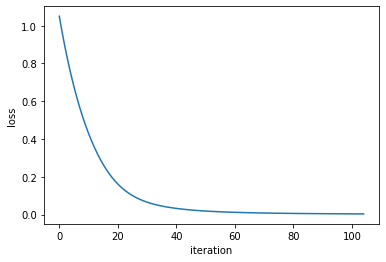

In [17]:
plt.plot(model.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

********END**********